<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter Hate Speech Analysis System</b></div>

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://ichef.bbci.co.uk/news/976/cpsprodpb/13B2F/production/_127678608_gettyimages-1244636244.jpg" width="500px">
</div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of hate Speech Analysis System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        hate_speech = number of CF users who judged the tweet to be hate speech.

        offensive_language = number of CF users who judged the tweet to be offensive.

        neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

        class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

C:\Users\waqar\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [15]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
# Read the Data in CSV Format
dataset = pd.read_csv('labeled_data.csv')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print(" Data:")
print("=============\n")
dataset.sample(5)

 Data:



Unnamed: 0  count  hate_speech  offensive_language  neither  label  \
23346       23832      3            0                   3        0      1   
22841       23320      3            0                   3        0      1   
9287         9543      3            0                   3        0      1   
15935       16304      3            0                   3        0      1   
18224       18629      3            0                   0        3      2   

                                                   tweet  
23346  You know how these hoes be! http://t.co/EdHIfN...  
22841  Why 2 dudes would wanna fuck the same bitch at...  
9287   Fuck these bitches RT @KingHorseDick: Stop wom...  
15935  RT @KMURDER1000: How am i suppose to ride for ...  
18224  RT @ZekeJMiller: RT @MarcACaputo: "I've met fe...

In [16]:
# Define the mapping dictionary
label_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}

# Map the numeric values to their corresponding labels
dataset['label'] = dataset['label'].map(label_mapping)

# List of columns you want to keep
columns_to_keep = ['label', 'tweet']

# Drop columns that are not in the list 'columns_to_keep'
dataset = dataset.drop(columns=dataset.columns.difference(columns_to_keep))
dataset

label                                              tweet
0                 Neither  !!! RT @mayasolovely: As a woman you shouldn't...
1      Offensive Language  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      Offensive Language  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      Offensive Language  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      Offensive Language  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...                   ...                                                ...
24778  Offensive Language  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779             Neither  you've gone and broke the wrong heart baby, an...
24780  Offensive Language  young buck wanna eat!!.. dat nigguh like I ain...
24781  Offensive Language              youu got wild bitches tellin you lies
24782             Neither  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 2 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [17]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (24783, 2)


In [18]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['label', 'tweet'], dtype='object')


In [19]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

label    object
tweet    object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:15px ; color:#034914">

**Tweet**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [20]:
dataset.describe(include='all')

label                                              tweet
count                24783                                              24783
unique                   3                                              24783
top     Offensive Language  !!! RT @mayasolovely: As a woman you shouldn't...
freq                 19190                                                  1

In [21]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tweet**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [22]:
show_details(dataset)

label  tweet
Missed_Values          0.0    0.0
Missed_Values %        0.0    0.0
Duplicated values      0.0    0.0
Duplicated values %    0.0    0.0

In [25]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.label.value_counts()
Sentiment.to_frame()

The Count of sentiments in the dataset : 



count
label                    
Offensive Language  19190
Neither              4163
Hate Speech          1430

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [26]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

label  tweet
Missed_Values          0.0    0.0
Missed_Values %        0.0    0.0
Duplicated values      0.0    0.0
Duplicated values %    0.0    0.0

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [30]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['tweet'] = dataset['tweet'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset.head(20)


Training Data After Pre-processing:



label                                              tweet
0              Neither  woman shouldnt complain cleaning house amp man...
1   Offensive Language     boy dats coldtyga dwn bad cuffin dat hoe place
2   Offensive Language       dawg ever fuck bitch start cry confused shit
3   Offensive Language                                   look like tranny
4   Offensive Language        shit hear might true might faker bitch told
5   Offensive Language  shit blows meclaim faithful somebody still fuc...
6   Offensive Language         sit hate another bitch got much shit going
7   Offensive Language        cause tired big bitches coming skinny girls
8   Offensive Language                 amp might get bitch back amp thats
9   Offensive Language              hobbies include fighting mariam bitch
10  Offensive Language  keeks bitch curves everyone lol walked convers...
11  Offensive Language                         murda gang bitch gang land
12  Offensive Language                              hoes smoke losers yea
13  Offensive Language                             bad bitches thing like
14  Offensive Language                                          bitch get
15  Offensive Language                                   bitch nigga miss
16  Offensive Language                                 bitch plz whatever
17  Offensive Language                                         bitch love
18  Offensive Language                           bitches get cut everyday
19  Offensive Language                         black bottle amp bad bitch

In [31]:
dataset

label                                              tweet
0                 Neither  woman shouldnt complain cleaning house amp man...
1      Offensive Language     boy dats coldtyga dwn bad cuffin dat hoe place
2      Offensive Language       dawg ever fuck bitch start cry confused shit
3      Offensive Language                                   look like tranny
4      Offensive Language        shit hear might true might faker bitch told
...                   ...                                                ...
24778  Offensive Language  yous muthafin lie right trash mine bible scrip...
24779             Neither  youve gone broke wrong heart baby drove rednec...
24780  Offensive Language  young buck wanna eat dat nigguh like aint fuck...
24781  Offensive Language                  youu got wild bitches tellin lies
24782             Neither  ruffled ntac eileen dahlia beautiful color com...

[24783 rows x 2 columns]

In [32]:
def filter_tweets_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    dataset['Num_Words'] = dataset['tweet'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_tweets_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



label                                              tweet
0             Neither  woman shouldnt complain cleaning house amp man...
1  Offensive Language     boy dats coldtyga dwn bad cuffin dat hoe place
2  Offensive Language       dawg ever fuck bitch start cry confused shit
3  Offensive Language                                   look like tranny
4  Offensive Language        shit hear might true might faker bitch told

In [34]:
# Reset the index
dataset = dataset.reset_index(drop=True)
dataset

label                                              tweet
0                 Neither  woman shouldnt complain cleaning house amp man...
1      Offensive Language     boy dats coldtyga dwn bad cuffin dat hoe place
2      Offensive Language       dawg ever fuck bitch start cry confused shit
3      Offensive Language                                   look like tranny
4      Offensive Language        shit hear might true might faker bitch told
...                   ...                                                ...
22757  Offensive Language  yous muthafin lie right trash mine bible scrip...
22758             Neither  youve gone broke wrong heart baby drove rednec...
22759  Offensive Language  young buck wanna eat dat nigguh like aint fuck...
22760  Offensive Language                  youu got wild bitches tellin lies
22761             Neither  ruffled ntac eileen dahlia beautiful color com...

[22762 rows x 2 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [35]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['label', 'tweet'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 22762


In [36]:
dataset.describe()

label            tweet
count                22762            22762
unique                   3            22289
top     Offensive Language  hoes aint loyal
freq                 17643               29

In [38]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.label.value_counts()
Sentiment.to_frame().T

The Count of sentiments in the dataset : 



label  Offensive Language  Neither  Hate Speech
count               17643     3831         1288

In [39]:
print(f'The unique values of Sentiments : {len(dataset.label.unique())}')
print('**' * 20)
print(dataset.label.unique())

The unique values of Sentiments : 3
****************************************
['Neither' 'Offensive Language' 'Hate Speech']



Number of instances and Classes in Training Dataset:



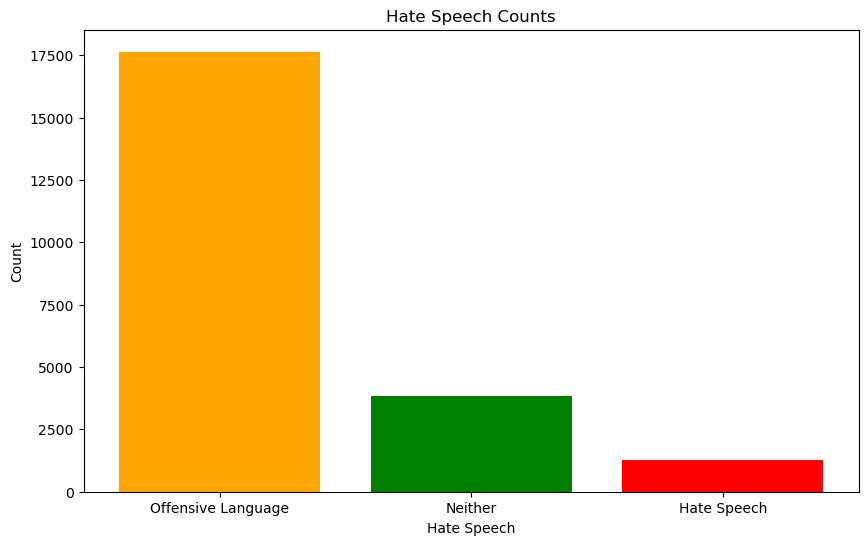

In [40]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['label'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Neither': 'green', 'Offensive Language': 'orange', 'Hate Speech': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Hate Speech')
plt.ylabel('Count')
plt.title('Hate Speech Counts')

# Show the bar graph
plt.show()


In [41]:
import plotly.graph_objects as go

sentiment_counts = dataset['label'].value_counts().sort_index()

sentiment_labels = ['Hate Speech', 'Offensive Language', 'Neither']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Classes Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


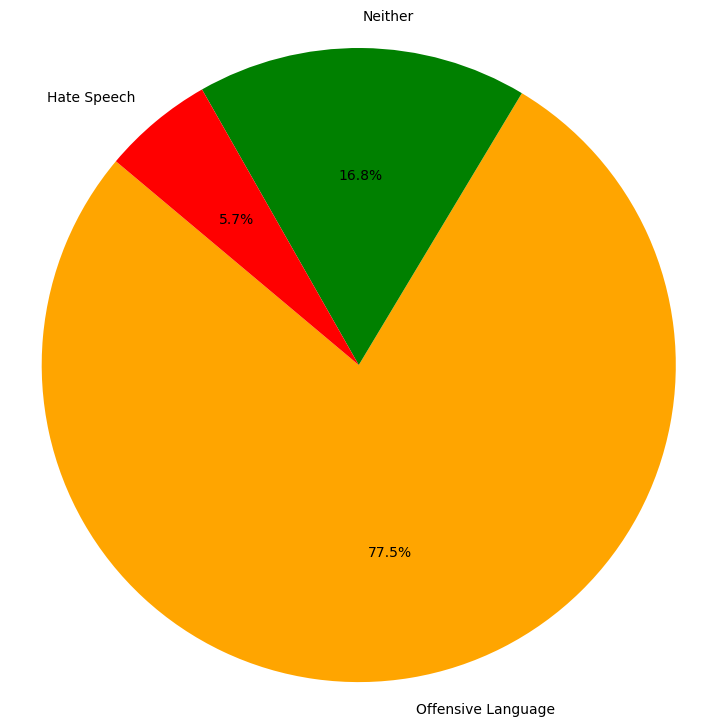

In [42]:
sentiment_counts = dataset['label'].value_counts()

# Define colors for each sentiment
colors = {'Neither': 'green', 'Offensive Language': 'orange', 'Hate Speech': 'red'}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Shape of the Training Data

In [43]:
dataset.shape

(22762, 2)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [45]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['tweet'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["label"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['tweet'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



tweet               label  \
0  [woman, shouldnt, complain, cleaning, house, a...             Neither   
1  [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...  Offensive Language   
2  [dawg, ever, fuck, bitch, start, cry, confused...  Offensive Language   

                     Token_Length  
0  [5, 8, 8, 8, 5, 3, 3, 6, 4, 5]  
1     [3, 4, 8, 3, 3, 6, 3, 3, 5]  
2        [4, 4, 4, 5, 5, 3, 8, 4]

### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [46]:
preprocessed_dataset['Tweet length'] = preprocessed_dataset['tweet'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['tweet'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(3)

label                                              tweet  \
0             Neither  woman shouldnt complain cleaning house amp man...   
1  Offensive Language     boy dats coldtyga dwn bad cuffin dat hoe place   
2  Offensive Language       dawg ever fuck bitch start cry confused shit   

   Tweet length  word_count  
0            64          10  
1            46           9  
2            44           8

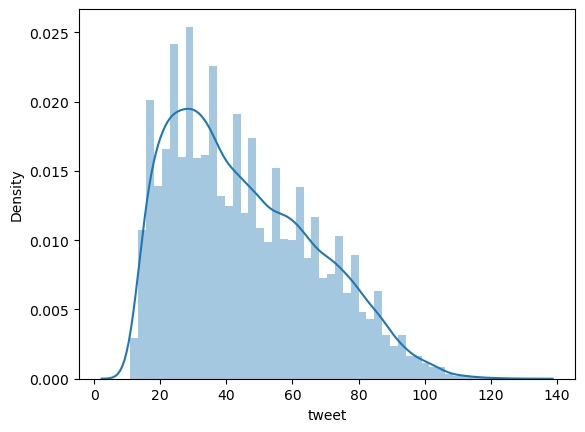

In [47]:
import seaborn as sns
text_length=preprocessed_dataset['tweet'].str.len()
sns.distplot(text_length)
plt.show()

In [48]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

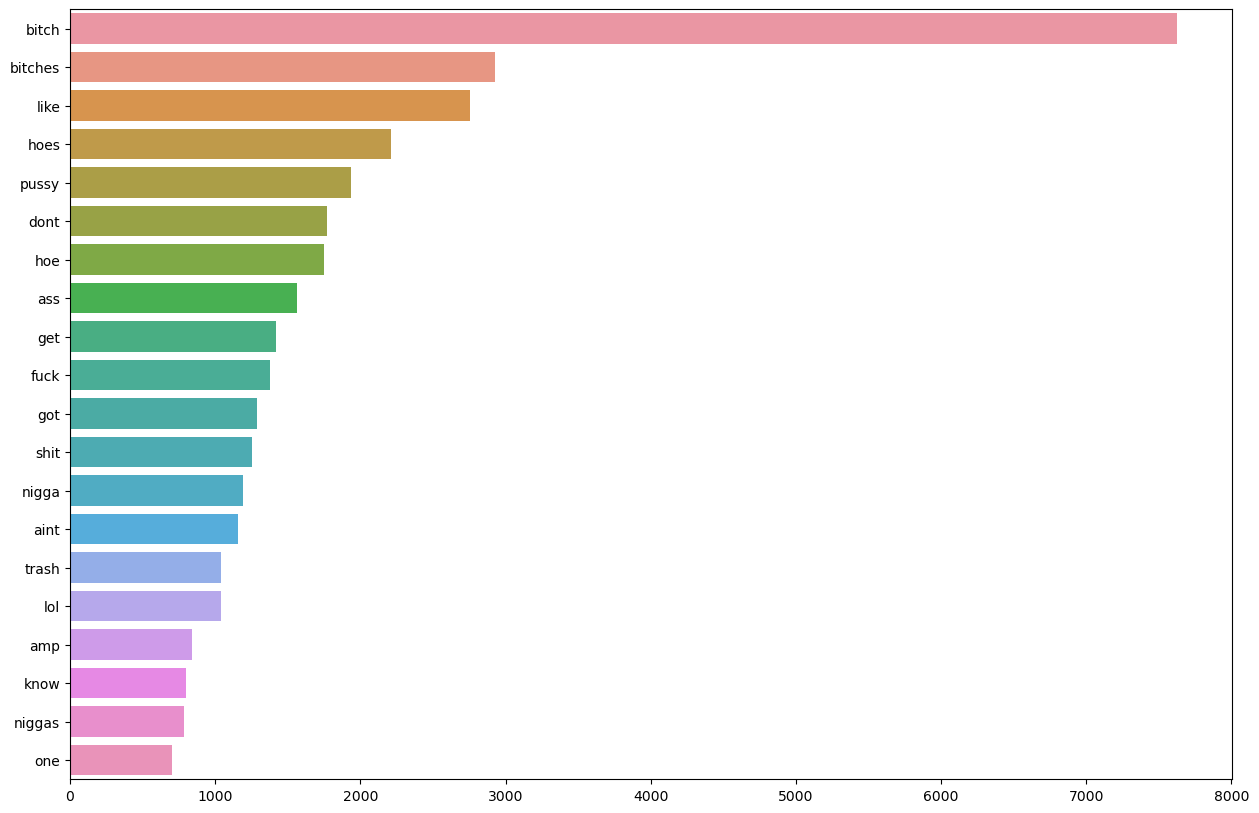

In [49]:
plot_top_non_stopwords_barchart(preprocessed_dataset['tweet'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

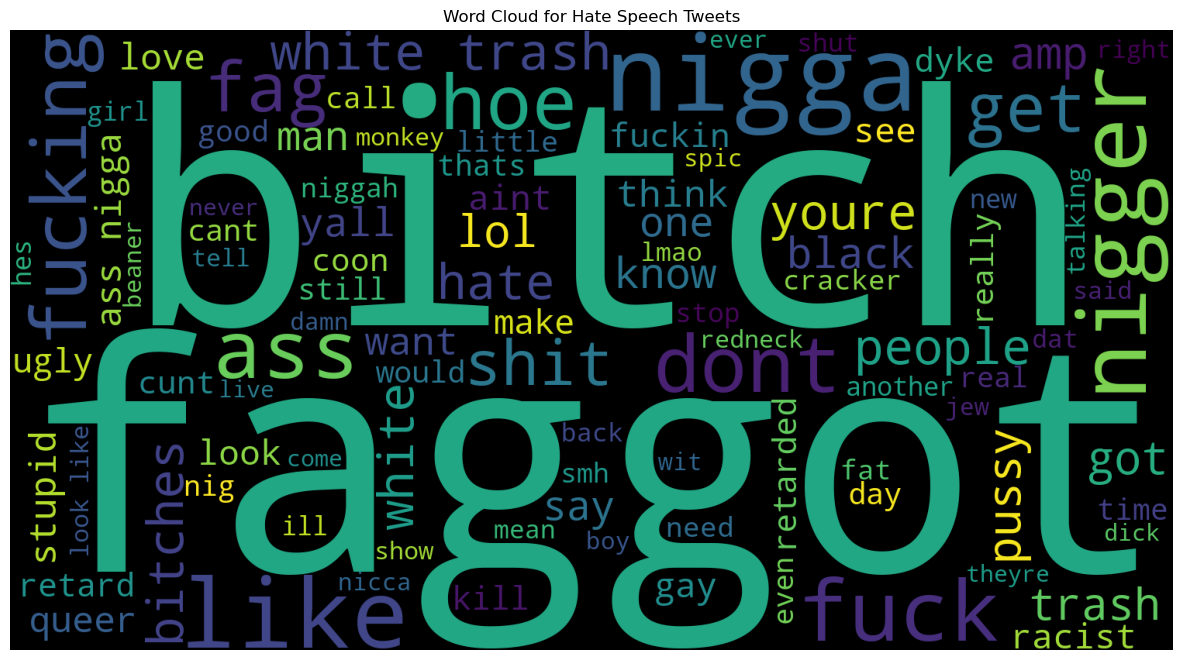

In [50]:
from wordcloud import WordCloud
stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['label'] == 'Hate Speech']['tweet']

pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Hate Speech Tweets')
plt.axis('off')
plt.show()


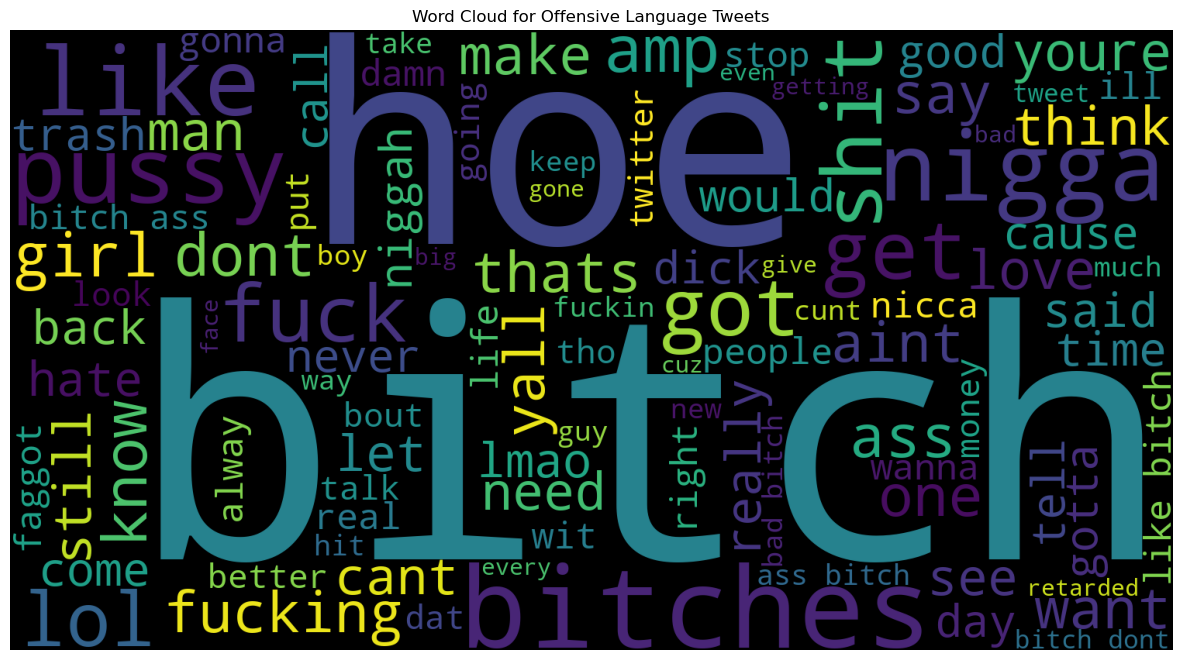

In [51]:
negative_reviews = dataset[dataset['label'] == 'Offensive Language']['tweet']
pos = ' '.join(map(str, negative_reviews))

pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Offensive Language Tweets')
plt.axis('off')
plt.show()

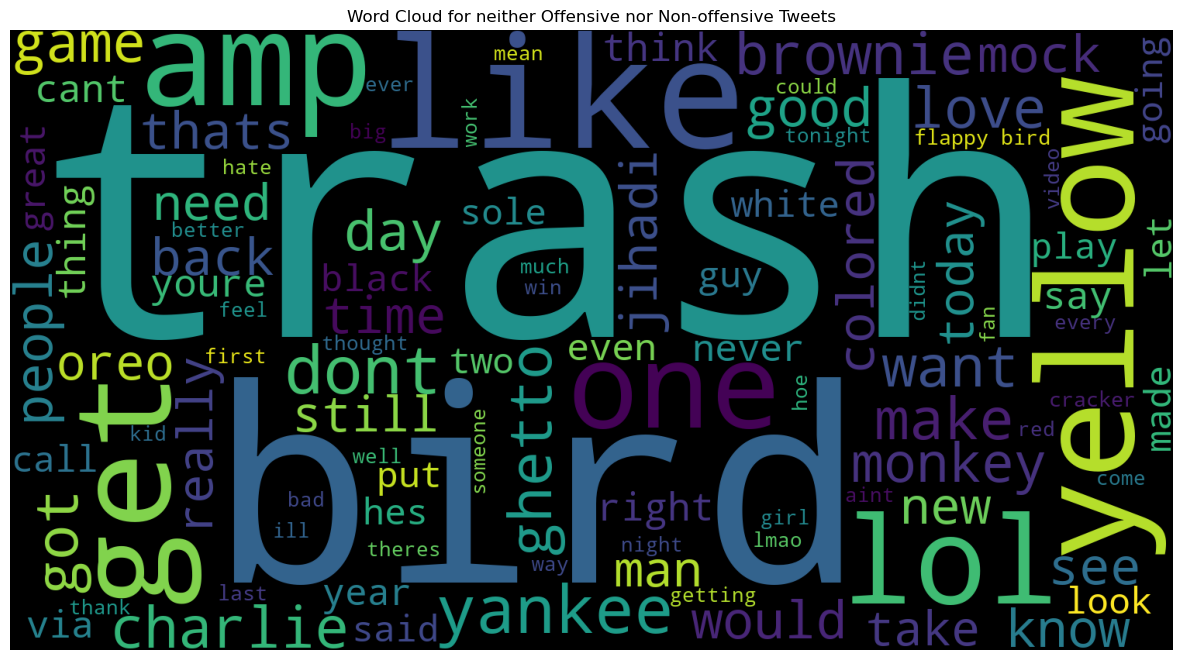

In [52]:
neutral_reviews = dataset[dataset['label'] == 'Neither']['tweet']
pos = ' '.join(map(str, neutral_reviews))

pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for neither Offensive nor Non-offensive Tweets')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [53]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['tweet'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

Word  count
0     bitch   7626
1   bitches   2931
2      like   2758
3      hoes   2211
4     pussy   1937
5      dont   1769
6       hoe   1747
7       ass   1563
8       get   1421
9      fuck   1381
10      got   1285
11     shit   1251
12    nigga   1192
13     aint   1160
14    trash   1039
15      lol   1039
16      amp    842
17     know    798
18   niggas    785
19      one    700

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

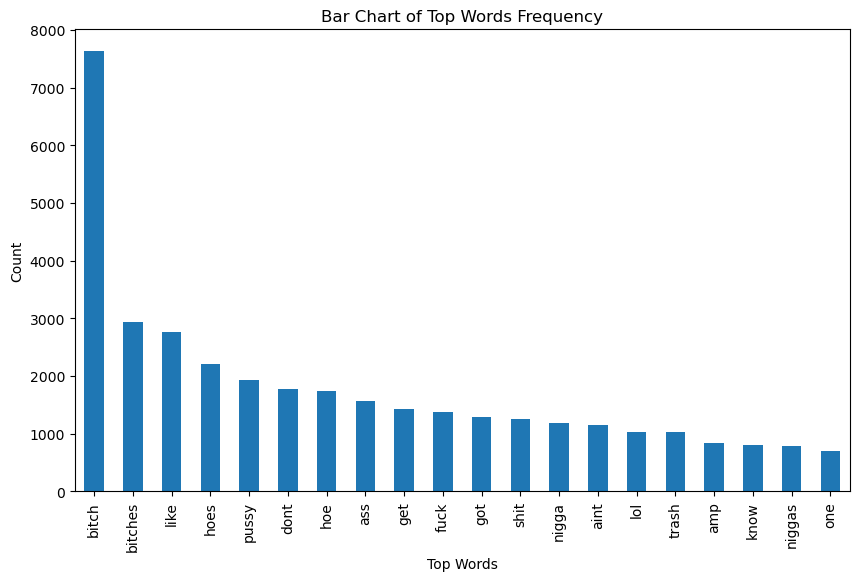

In [54]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [55]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['tweet'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

Text  Count
0    bitch ass    232
1   like bitch    221
2    look like    203
3    ass bitch    191
4    bad bitch    174
5   fuck bitch    144
6   bitch dont    144
7  bad bitches    137
8    ass nigga    130
9    hoes aint    126

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

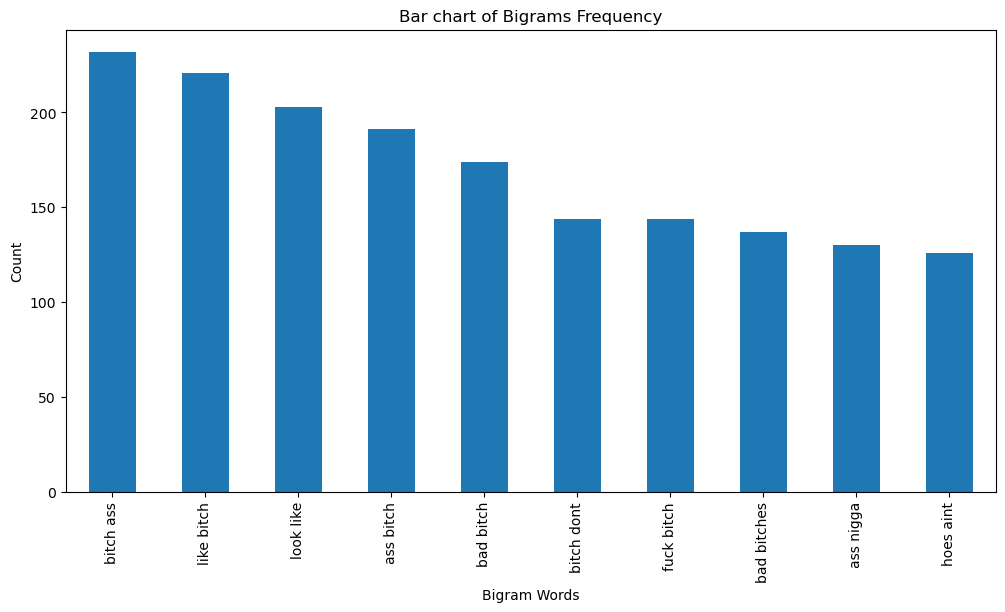

In [56]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [57]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['tweet']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


In [58]:
# Save the fitted vectorizer to a file
vectorizer_filename = 'trained_count_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(count_vectorizer, f)

## Convert Input of Training Data into Feature Vectors

In [59]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



aap  ability  able  abo  abortion  abs  absolute  absolutely  abt  abu  \
0    0        0     0    0         0    0         0           0    0    0   
1    0        0     0    0         0    0         0           0    0    0   
2    0        0     0    0         0    0         0           0    0    0   
3    0        0     0    0         0    0         0           0    0    0   
4    0        0     0    0         0    0         0           0    0    0   

   ...  yuh  yung  yup  zebra  zebras  zero  zimmerman  zip  zone  zoo  
0  ...    0     0    0      0       0     0          0    0     0    0  
1  ...    0     0    0      0       0     0          0    0     0    0  
2  ...    0     0    0      0       0     0          0    0     0    0  
3  ...    0     0    0      0       0     0          0    0     0    0  
4  ...    0     0    0      0       0     0          0    0     0    0  

[5 rows x 5000 columns]

# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [60]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["label"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



label
0             Neither
1  Offensive Language
2  Offensive Language
3  Offensive Language
4  Offensive Language

In [62]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['label'] = label_encoder.fit_transform(dataset_output['label'])

In [63]:
dataset_output

label
0          1
1          2
2          2
3          2
4          2
...      ...
22757      2
22758      1
22759      2
22760      2
22761      1

[22762 rows x 1 columns]

In [64]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [65]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [66]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [67]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [68]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [70]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.89


Precision Score of Random Forest Classifier:

0.87


Recall Score of Random Forest Classifier:

0.89


F1 Score of Random Forest Classifier:

0.88


In [71]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.37      0.18      0.24       270
           1       0.80      0.85      0.82       722
           2       0.92      0.95      0.93      3561

    accuracy                           0.89      4553
   macro avg       0.70      0.66      0.67      4553
weighted avg       0.87      0.89      0.88      4553



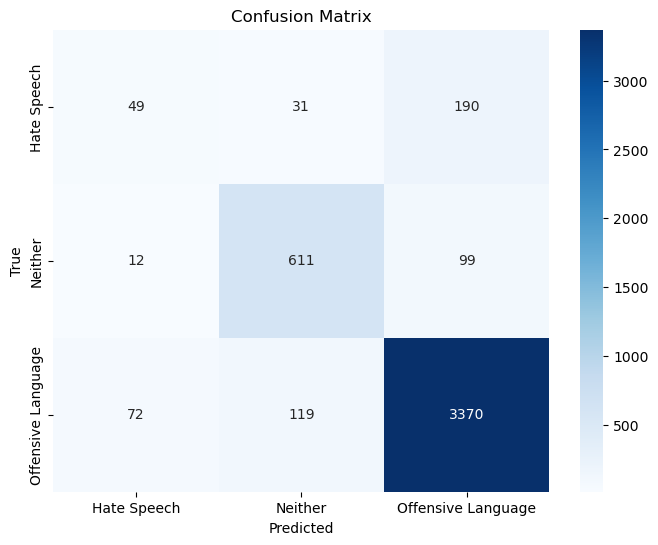

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [73]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.9

precision Score of LR_claasifier:

0.89


Recall Score of LR_claasifier:

0.9


F1 Score of LR_claasifier:

0.89


In [74]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.52      0.24      0.33       270
           1       0.82      0.86      0.84       722
           2       0.93      0.96      0.94      3561

    accuracy                           0.90      4553
   macro avg       0.76      0.69      0.70      4553
weighted avg       0.89      0.90      0.89      4553



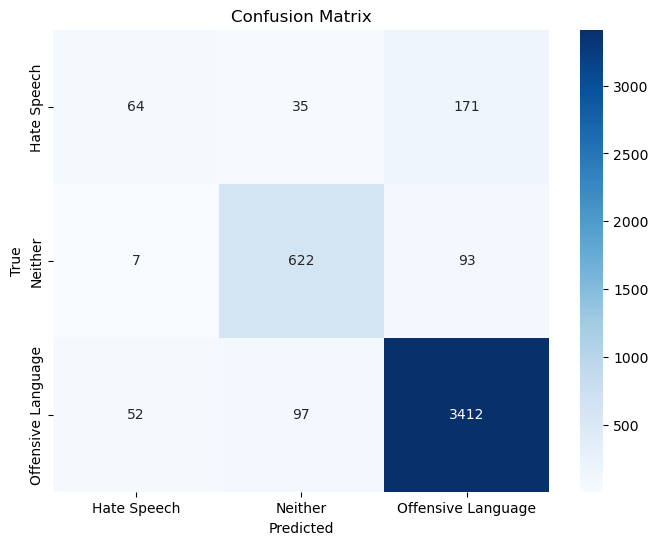

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [76]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.88


Precision Score of BernoulliNB:

0.86


Recall Score of BernoulliNB:

0.88


F1 Score of BernoulliNB:

0.86


In [77]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.37      0.13      0.19       270
           1       0.82      0.73      0.77       722
           2       0.90      0.96      0.93      3561

    accuracy                           0.88      4553
   macro avg       0.70      0.61      0.63      4553
weighted avg       0.86      0.88      0.86      4553



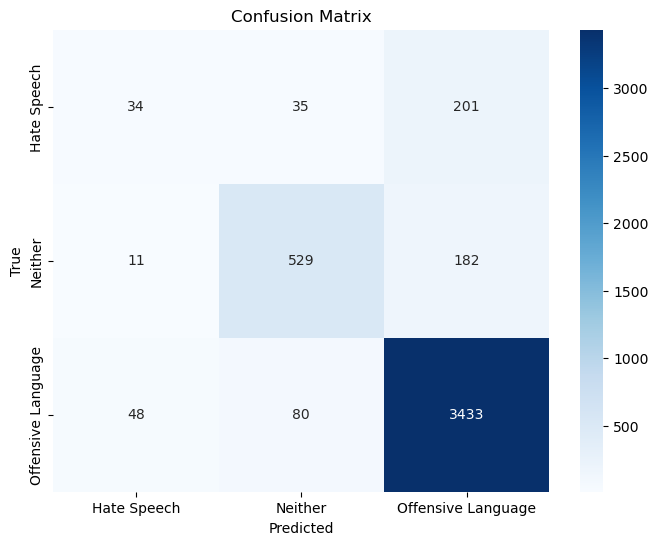

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [79]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.88

precision Score of LinearSVC:

0.87


Recall Score of LinearSVC:

0.88


F1 Score of LinearSVC:

0.88


In [80]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.36      0.28      0.32       270
           1       0.81      0.81      0.81       722
           2       0.92      0.94      0.93      3561

    accuracy                           0.88      4553
   macro avg       0.70      0.68      0.69      4553
weighted avg       0.87      0.88      0.88      4553



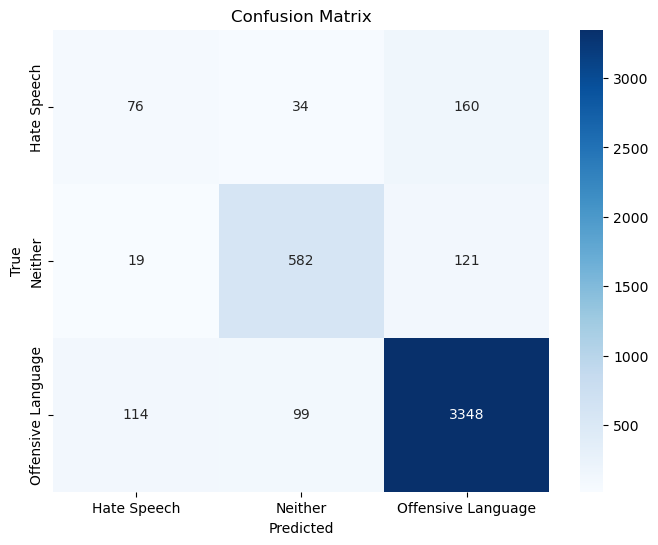

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [82]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.88

precision Score of MultinomialNB:

0.86


Recall Score of MultinomialNB:

0.88


F1 Score of MultinomialNB:

0.87


In [83]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.37      0.19      0.25       270
           1       0.83      0.75      0.79       722
           2       0.91      0.96      0.93      3561

    accuracy                           0.88      4553
   macro avg       0.70      0.63      0.66      4553
weighted avg       0.86      0.88      0.87      4553



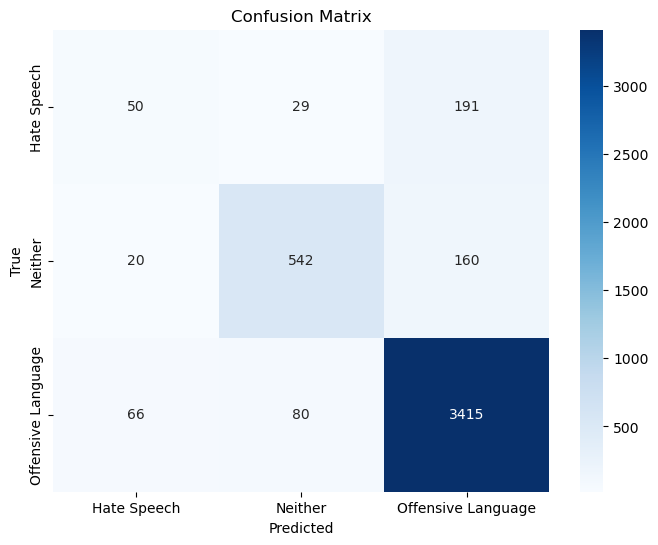

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [85]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.89   |    0.87   |  0.89  |   0.88   |
| Logistic Regression Classifier |   0.9    |    0.89   |  0.9   |   0.89   |
|     Bernoulli Naive Bayes      |   0.88   |    0.86   |  0.88  |   0.86   |
|           Linear SVC           |   0.88   |    0.87   |  0.88  |   0.88   |
|    Multinomial Naive Bayes     |   0.88   |    0.86   |  0.88  |   0.87   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | f1_score |
+--------------------------------+----------+-----------+--------+----------+
| Logi

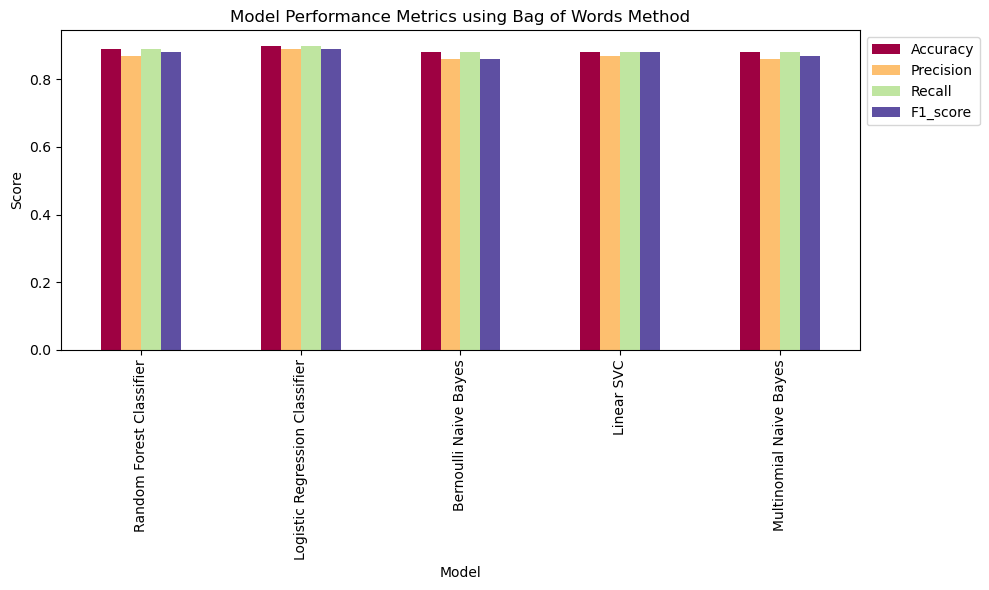

In [87]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [88]:
filename = 'updatedTrainedModel.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [89]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 3000 Features 
train_text = preprocessed_dataset['tweet']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [90]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



aap  ability  able  abo  abortion  abs  absolute  absolutely  abt  abu  \
0  0.0      0.0   0.0  0.0       0.0  0.0       0.0         0.0  0.0  0.0   
1  0.0      0.0   0.0  0.0       0.0  0.0       0.0         0.0  0.0  0.0   
2  0.0      0.0   0.0  0.0       0.0  0.0       0.0         0.0  0.0  0.0   
3  0.0      0.0   0.0  0.0       0.0  0.0       0.0         0.0  0.0  0.0   
4  0.0      0.0   0.0  0.0       0.0  0.0       0.0         0.0  0.0  0.0   

   ...  yuh  yung  yup  zebra  zebras  zero  zimmerman  zip  zone  zoo  
0  ...  0.0   0.0  0.0    0.0     0.0   0.0        0.0  0.0   0.0  0.0  
1  ...  0.0   0.0  0.0    0.0     0.0   0.0        0.0  0.0   0.0  0.0  
2  ...  0.0   0.0  0.0    0.0     0.0   0.0        0.0  0.0   0.0  0.0  
3  ...  0.0   0.0  0.0    0.0     0.0   0.0        0.0  0.0   0.0  0.0  
4  ...  0.0   0.0  0.0    0.0     0.0   0.0        0.0  0.0   0.0  0.0  

[5 rows x 5000 columns]

In [91]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [92]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [93]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.89


Precision Score of Random Forest Classifier:

0.71


Recall Score of Random Forest Classifier:

0.89


F1 Score of Random Forest Classifier:

0.88


In [94]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.42      0.16      0.23       270
           1       0.78      0.86      0.82       722
           2       0.93      0.95      0.94      3561

    accuracy                           0.89      4553
   macro avg       0.71      0.66      0.66      4553
weighted avg       0.87      0.89      0.88      4553



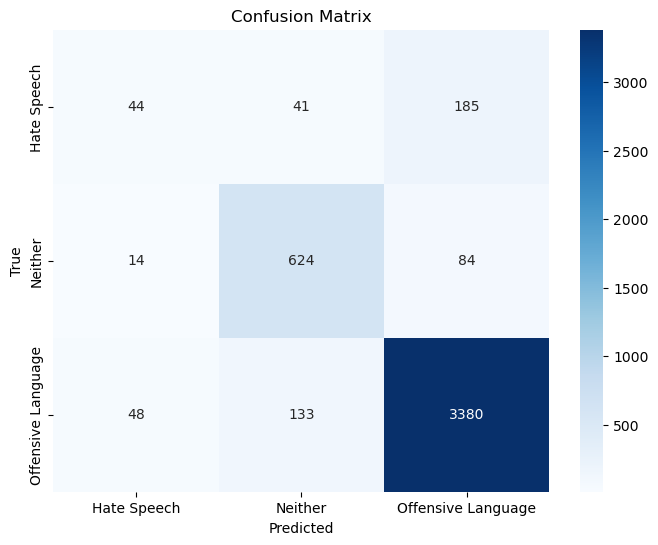

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [96]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [97]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.9

precision Score of LR_claasifier:

0.9


Recall Score of LR_claasifier:

0.9


F1 Score of LR_claasifier:

0.88


In [98]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.66      0.15      0.25       270
           1       0.84      0.83      0.83       722
           2       0.91      0.97      0.94      3561

    accuracy                           0.90      4553
   macro avg       0.80      0.65      0.67      4553
weighted avg       0.89      0.90      0.88      4553



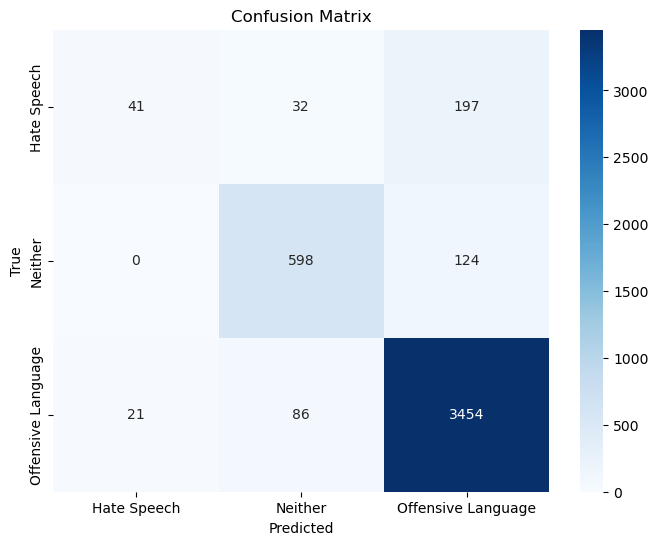

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [100]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [101]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.89

precision Score of LinearSVC:

0.76


Recall Score of LinearSVC:

0.89


F1 Score of LinearSVC:

0.88


In [102]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.52      0.23      0.31       270
           1       0.83      0.83      0.83       722
           2       0.92      0.96      0.94      3561

    accuracy                           0.89      4553
   macro avg       0.76      0.67      0.69      4553
weighted avg       0.88      0.89      0.88      4553



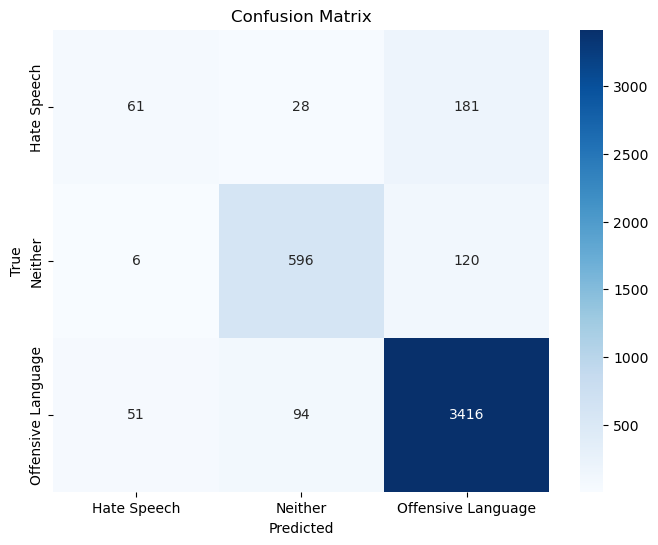

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [104]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [105]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.88


Precision Score of BernoulliNB:

0.7


Recall Score of BernoulliNB:

0.88


F1 Score of BernoulliNB:

0.86


In [106]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.37      0.13      0.19       270
           1       0.82      0.73      0.77       722
           2       0.90      0.96      0.93      3561

    accuracy                           0.88      4553
   macro avg       0.70      0.61      0.63      4553
weighted avg       0.86      0.88      0.86      4553



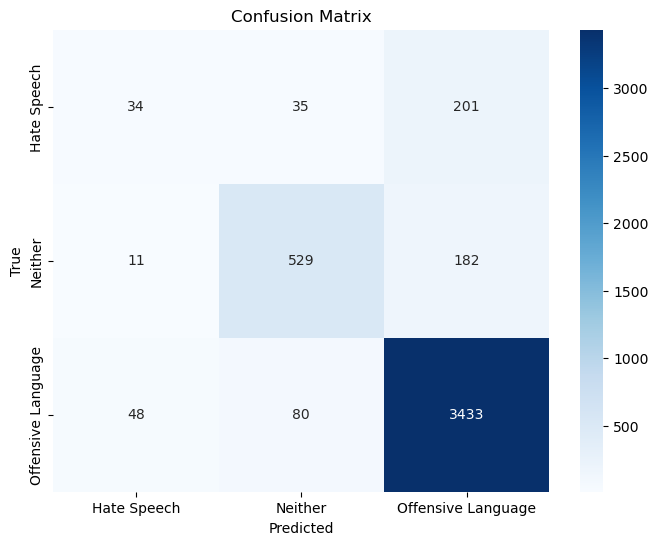

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [108]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [109]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.84

precision Score of MultinomialNB:

0.91


Recall Score of MultinomialNB:

0.84


F1 Score of MultinomialNB:

0.79


In [110]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       270
           1       0.90      0.38      0.53       722
           2       0.83      0.99      0.91      3561

    accuracy                           0.84      4553
   macro avg       0.91      0.46      0.48      4553
weighted avg       0.85      0.84      0.79      4553



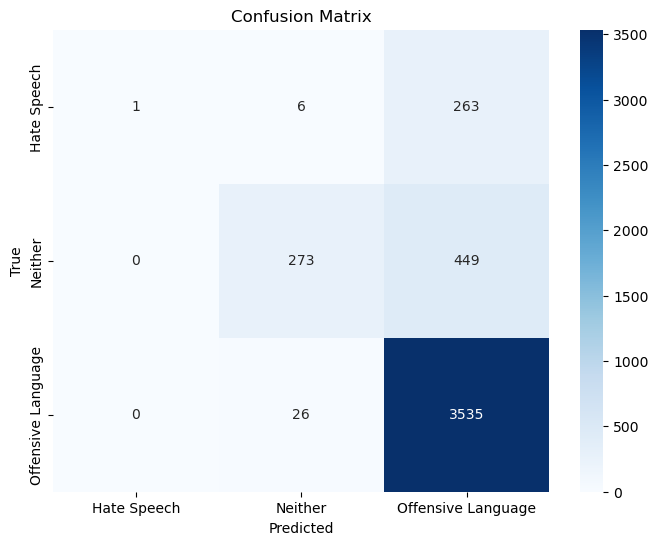

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Hate Speech", "Neither", "Offensive Language"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [112]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.89   |    0.71   |  0.89  |   0.88   |
| Logistic Regression Classifier |   0.9    |    0.9    |  0.9   |   0.88   |
|     Bernoulli Naive Bayes      |   0.88   |    0.7    |  0.88  |   0.86   |
|           Linear SVC           |   0.89   |    0.76   |  0.89  |   0.88   |
|    Multinomial Naive Bayes     |   0.84   |    0.91   |  0.84  |   0.79   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | f1_score |
+--------------------------------+----------+-----------+--------+----------+
| Logi

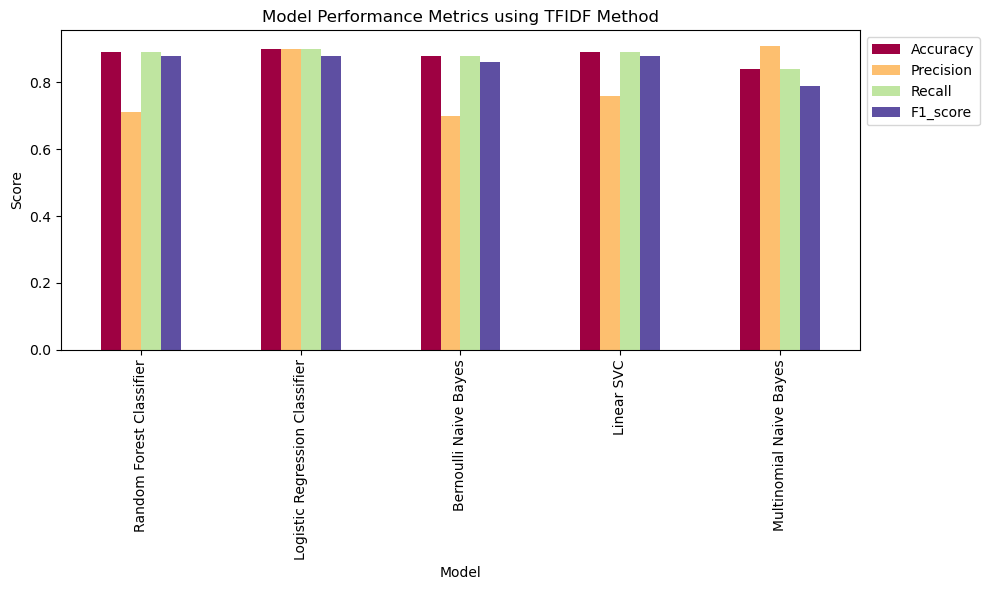

In [113]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [114]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [115]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [116]:
def make_Prediction(text):
    if text == 0:
        emotion ="Hate Speech"
    elif text == 1:
        emotion ="Neither"
    elif text == 2:
        emotion ="Offensive Language"
    return emotion

In [117]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [119]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [120]:
root = Tk()
root.title('Hate Speech Analysis System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Hate Speech Analysis System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the Tweet',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='Label: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()